In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random as rd
from sklearn.preprocessing import minmax_scale

%matplotlib inline


In [2]:
X = np.array([[10,125],[12,187], [28,196], [18,125], [8,174], [23,125], [14,132],[20,133], [1,180]])

#column_1 = minmax_scale(X[:,0], feature_range=(0,1))#first column you don't want to scale
#column_2 = minmax_scale(X[:,1], feature_range=(0,1)) #second column you want to scale

#X = np.stack((column_1, column_2), axis=1) #stack both columns to get a 2d array

dataset = pd.DataFrame(X, columns = ['Column_A','Column_B'])
dataset


,Column_A,Column_B
0,10,125
1,12,187
2,28,196
3,18,125
4,8,174
5,23,125
6,14,132
7,20,133
8,1,180


In [3]:
X = dataset.iloc[:].values
X

array([[ 10, 125],
       [ 12, 187],
       [ 28, 196],
       [ 18, 125],
       [  8, 174],
       [ 23, 125],
       [ 14, 132],
       [ 20, 133],
       [  1, 180]])

In [4]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter = 100

In [5]:
m

9

In [6]:
n

2

In [7]:
K=2 # number of clusters

In [8]:
Centroids=np.array([]).reshape(n,0) 


In [9]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [10]:
Output={}


In [11]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [12]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [13]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

In [14]:
Output

{1: array([[ 10., 125.],
        [ 18., 125.],
        [ 23., 125.],
        [ 14., 132.],
        [ 20., 133.]]),
 2: array([[ 12., 187.],
        [ 28., 196.],
        [  8., 174.],
        [  1., 180.]])}

In [15]:
Centroids

array([[ 17.  ,  12.25],
       [128.  , 184.25]])

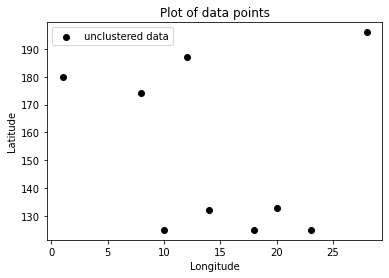

In [16]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Plot of data points')
plt.show()

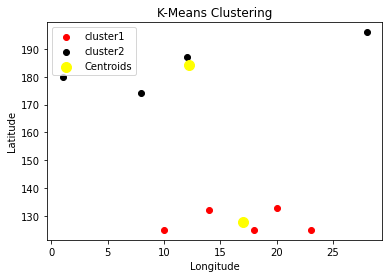

In [17]:
color=['red','black','blue', 'purple']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("K-Means Clustering")
plt.legend()
plt.savefig('KMeansClustering.png')
plt.show()